"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""<br>
Authors: Abzal Aidakhmetov and Daniyal Issin                   <br>
Contact: abzal.aidakhmetov@nu.edu.kz, daniyal.issin@nu.edu.kz  <br>
Department of Electrical and Computer Engineering              <br>
School of Engineering and Digital Sciences                     <br>
Nazarbayev University                                          <br>
Astana, Republic of Kazakhstan, 010000                        <br>
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""<br>

# Machine Learning-based Final Exam Score Prediction

## Abstract

The paper compares different regression models to predict the final exam grades of secondary school students based on their student grades, demographic information, and social aspects. The paper results were compared to the results obtained from Kaggle [2]. A glance at the heatmap shows that most attributes are not directly correlated with G3 (the final exam score). The author of [2] did not use attributes G1 and G2, which are the first and second exam scores, respectively. On the other hand, this paper included G1 and G2 to compare the performance of each model's performance and find any relationship between previous and future exam scores. Overall, the previous exam scores play a significant role in predicting future exam scores as our regression models have shown better performance on average.

## Introduction

The dataset was retrieved from https://repositorium.sdum.uminho.pt/handle/1822/8024 to predict the final exam score of each student in Mathematics. The dataset provided originally is about two Portuguese schools’ student achievements in two subjects. The data contains 1044 instances with 649 Portuguese language class students and 395 Mathematics class students. Our project focuses only on Mathematics class students. The features include student grades, demographic information, and social aspects of each student. They were obtained with the use of student reports and questionnaires.  

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Desktop\ML\ML Project\student\student-mat.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Literature review 

Originally the dataset appeared in 2008 in the paper provided by Paulo Cortez and Alica Silva from the University of Minho. They investigated the possible reasons for the lack of success in the core courses of Portuguese and Mathematics among secondary school students. The authors obtained real-world data by collecting student reports and questionnaires, including student grades, demographics, and social and school-related features. The two core classes were represented as binary/five-level classification and regression tasks. Even though the authors of [1] have made prediction capabilities of each model, their main goal was to summarize the best Data mining (DM) models. Therefore, we focused on comparing our results with the recent Kaggle competition student who won. In the Kaggle competition, they were given the same datasets as in [1]. However, they decided not to use the G1 and G2 features, which are previous exam scores. Also, the training and test data were split according to the 70/30 split. The evaluation was made prior to RMSE (Root Mean Squared Error) evaluation metric. 


## Methodology

As we are only focusing on the prediction of Mathematics scores among students, we have 395 instances and 33 attributes, with all of them having a Non-Null count. It was considered that some of the features such as father’s job (Fjob), mother’s job (Mjob), a reason to choose this school (reason), and student’s guardian (guardian) would make it more complex to compute. This is because we did not study dealing with multiple categories. One-hot encoding could be used. However, it complicates the Sequential feature selection (SFS) as it will add more features. 
Having 395 rows x 29 columns left. Consequently, all of the other categorical features had only two features and consequently were converted to numerical values 0 and 1.


In [4]:
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['famsize'] = df['famsize'].map({'LE3': 1, 'GT3': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
del df['Mjob']
del df['Fjob']
del df['guardian']
del df['reason']
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,2,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,1,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,1,0,2,2,1,2,...,5,5,4,4,5,4,11,9,9,9
391,0,1,17,1,1,1,3,1,2,1,...,2,4,5,3,4,2,3,14,16,16
392,0,1,21,0,0,1,1,1,1,1,...,5,5,3,3,3,3,3,10,8,7
393,0,1,18,0,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,10


Hereupon, the data was divided into training data and test data, 296 (75%) instances and 29 (25%) columns, respectively. 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,:28], df.iloc[:,28], random_state=100)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (296, 28)
X_test_shape: (99, 28)
y_train_shape: (296,)
y_test_shape: (99,)


To show the correlation between G3 (final exam grade) and other features, the heatmap was plotted. The trend has shown that the majority of features have low correlation with G3, ranging from |0.003| to |-0.036| except for G1 and G2, where 1 is the G3 itself. Noticeably, G1 and G2 are highly correlated with G3, |0.81| and |0.91|, respectively. 


<AxesSubplot:>

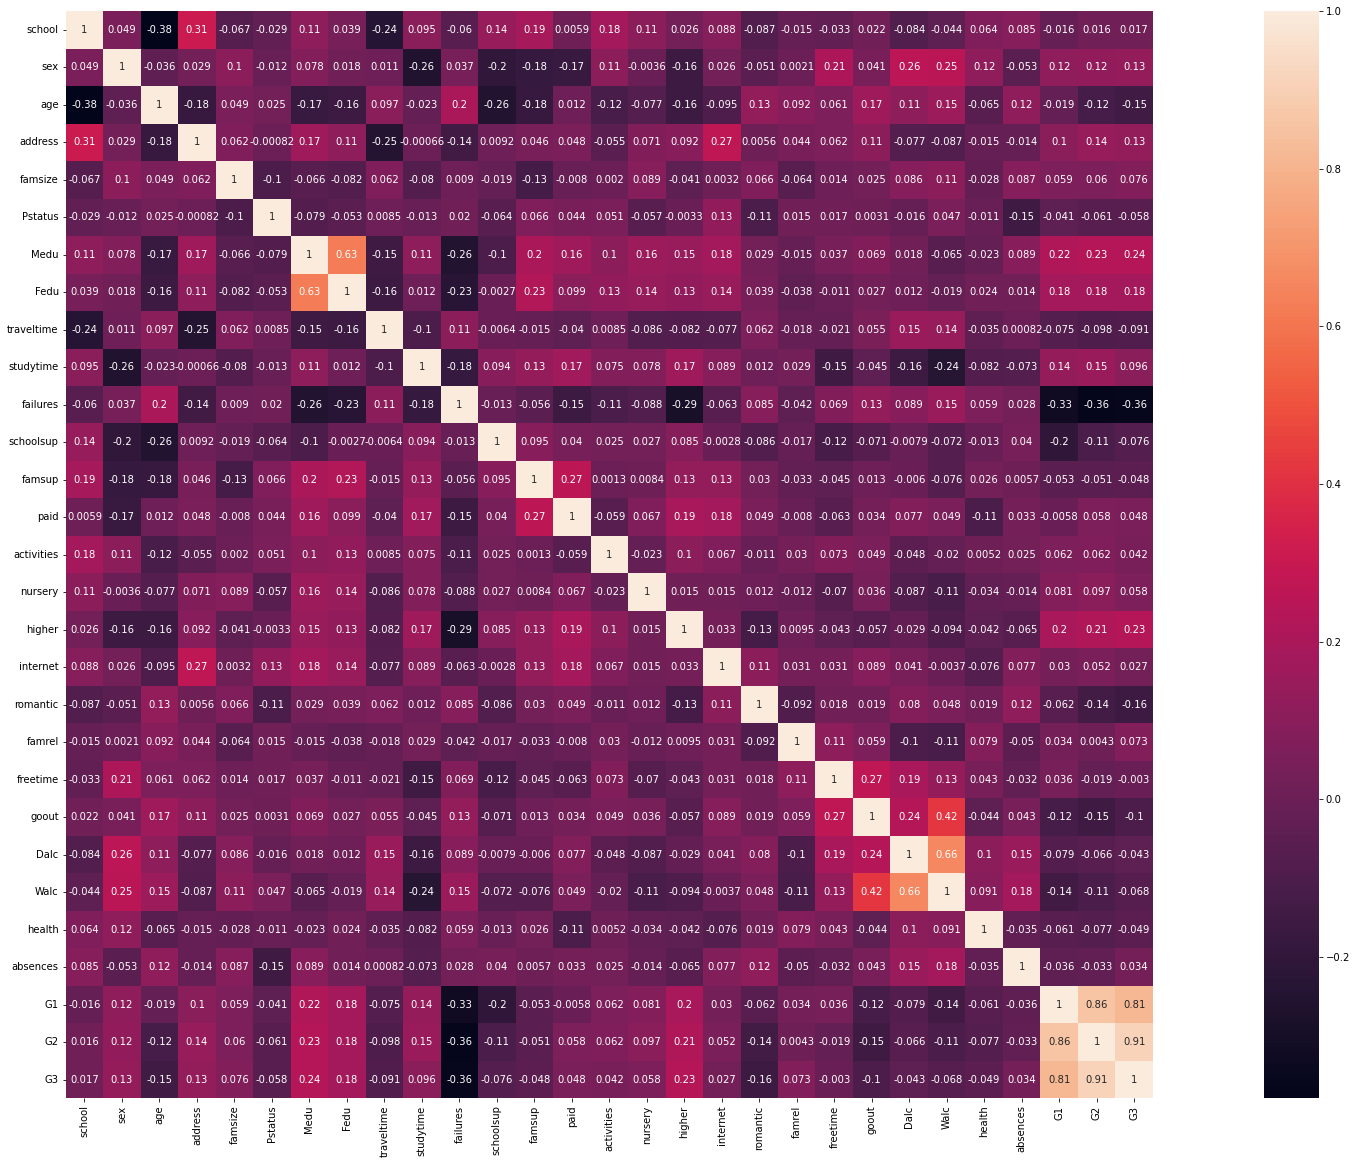

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.concat([X_train, y_train], axis=1)
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(train.corr(), annot=True, square=True, ax=ax)

In [7]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
20,1,1,15,1,0,1,4,3,1,2,...,0,4,4,1,1,1,1,0,13,14
19,1,1,16,1,1,1,4,3,1,1,...,0,3,1,3,1,3,5,4,8,10
269,1,0,18,0,0,1,2,1,2,2,...,1,4,3,5,1,2,3,0,6,0
124,1,0,16,1,0,1,2,2,1,2,...,1,5,4,4,1,1,5,0,8,7
329,1,0,17,1,0,1,4,4,2,3,...,1,4,3,3,1,2,4,4,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,0,17,1,0,0,2,2,1,2,...,1,3,3,1,1,2,4,0,9,8
359,0,0,18,1,1,1,1,1,2,3,...,0,5,3,2,1,1,4,0,18,16
323,1,0,17,1,0,1,3,1,1,3,...,0,3,4,3,2,3,5,1,12,14
280,1,1,17,1,1,0,4,1,2,1,...,1,4,5,4,2,4,5,30,8,8


After the heatmap analysis, the SFS was applied to add (forward selection) features to form a feature subset in a greedy fashion. The algorithm chooses the best feature to add at each stage of the selection process based on the cross-validation score of an estimator. The number of features to be selected is six due to the low correlation between G3 and other features. Therefore, the algorithm chose six features: the number of past class failures (failures), extra educational school support (schoolsup), quality of family relationship (famrel), number of school absences (absences), G1, G2.


In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

LR = LinearRegression()
# By setting shuffle=False in make_classification, the informative features are put first

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
sfs = SequentialFeatureSelector(LR, n_features_to_select=6, cv=kfold, n_jobs=-1) # by default the direction is 'forwards'
sfs.fit(X_train, y_train)
#a1 = print(sfs.get_support()) # using support we can see which feature is selected (True means selected, False means not selected)
a2 = list(sfs.get_support())
feat_names = list(sfs.feature_names_in_)
for i in range(len(a2)):
    if a2[i] == True:
        print(feat_names[i])

failures
schoolsup
famrel
absences
G1
G2


In [9]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,2,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,1,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,1,0,2,2,1,2,...,5,5,4,4,5,4,11,9,9,9
391,0,1,17,1,1,1,3,1,2,1,...,2,4,5,3,4,2,3,14,16,16
392,0,1,21,0,0,1,1,1,1,1,...,5,5,3,3,3,3,3,10,8,7
393,0,1,18,0,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,10


In [10]:
df = df[['G1', 'G2', 'failures', 'absences', 'schoolsup', 'famrel','G3']]
df

,G1,G2,failures,absences,schoolsup,famrel,G3
0,5,6,0,6,1,4,6
1,5,5,0,4,0,5,6
2,7,8,3,10,1,4,10
3,15,14,0,2,0,3,15
4,6,10,0,4,0,4,10
...,...,...,...,...,...,...,...
390,9,9,2,11,0,5,9
391,14,16,0,3,0,2,16
392,10,8,3,3,0,5,7
393,11,12,0,0,0,4,10


To scale the data, firstly, the data was split again into a 75/25 ratio of 96 (75%) instances and 29 (25%) columns, respectively. At the final stage of the dataset preprocessing, the data were scaled using StandardScaler, which standardizes the features by removing the mean and scaling to unit variance.


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,:6], df.iloc[:,6], random_state=42)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (296, 6)
X_test_shape: (99, 6)
y_train_shape: (296,)
y_test_shape: (99,)


In [12]:
X_train

,G1,G2,failures,absences,schoolsup,famrel
16,13,14,0,6,0,3
66,13,13,0,4,0,1
211,12,12,0,13,0,5
7,6,5,0,6,1,4
19,8,10,0,4,0,3
...,...,...,...,...,...,...
71,10,10,0,0,0,3
106,7,8,0,8,1,5
270,9,9,2,15,0,4
348,13,15,0,0,0,4


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[ 6.45843425e-01,  8.96620540e-01, -4.59198974e-01,
        -1.98095038e-03, -4.12262628e-01, -1.04476707e+00],
       [ 6.45843425e-01,  6.27179241e-01, -4.59198974e-01,
        -2.36525476e-01, -4.12262628e-01, -3.30207404e+00],
       [ 3.33984284e-01,  3.57737941e-01, -4.59198974e-01,
         8.18924889e-01, -4.12262628e-01,  1.21253989e+00],
       ...,
       [-6.01593142e-01, -4.50585957e-01,  2.25925895e+00,
         1.05346941e+00, -4.12262628e-01,  8.38864074e-02],
       [ 6.45843425e-01,  1.16606184e+00, -4.59198974e-01,
        -7.05614527e-01, -4.12262628e-01,  8.38864074e-02],
       [-2.89734000e-01,  6.27179241e-01, -4.59198974e-01,
        -2.36525476e-01, -4.12262628e-01,  1.21253989e+00]])

To compare the performance of various regression models, firstly, it was necessary to evaluate the models without hyperparameter tuning in order to find the initial accuracy. From Table 1 it can be seen that RandomForestRegressor is the most efficient model as it comes to the model without hyperparameter tuning.

  ### Table 1
| Regressors| RMSE|
| --- | --- | 
| KNeighbors Regression | 2.473 | 
| Decision Tree Regression | 1.807 | 
| Random Forest Regression | **1.774** | 
| Linear Regression | 2.080 | 
| Lasso Regression | 2.349 | 
| Rigde Regression | 2.081 | 
| AdaBoost Regression | 1.879 | 
| XgBoost Regression | 1.997 |

In [15]:
! pip install xgboost
from xgboost import XGBRegressor

In [16]:
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error
from sklearn import datasets
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


regressors = [
    KNeighborsRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    XGBRegressor()
]

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train_scaled, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test_scaled)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tRMSE score:", math.sqrt(mean_squared_error(y_test, y_pred))) 


KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 0.7363384323764139
	Mean absolute error: 1.5737373737373739
	R2 score: 0.7343853246764751
	RMSE score: 2.47370004632573
RandomForestRegressor()
	Training time: 0.183s
	Prediction time: 0.010s
	Explained variance: 0.863590109139304
	Mean absolute error: 1.1244309764309766
	R2 score: 0.8633712953488578
	RMSE score: 1.7741567156334823
DecisionTreeRegressor()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained variance: 0.8601136434094794
	Mean absolute error: 1.0808080808080809
	R2 score: 0.8581605357095405
	RMSE score: 1.8076716426599073
LinearRegression()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained variance: 0.8121394135994746
	Mean absolute error: 1.3116168725790367
	R2 score: 0.8121067950139166
	RMSE score: 2.0805422583621076
Lasso()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained variance: 0.7603591121125998
	Mean absolute error: 1.4840963443491408
	R2 score: 0.

After that, RandomizedSearchCV was applied to efficiently grid all the possible hyperparameters. As RandomizedSearchCV has narrowed down the best hyperparameter space in 100 randomly selected combinations, GridSearchCV was used to find the best hyperparameters combination among the altered hyperparameter space found in RandomizedSearchCV. Finally, each regression model predicted the final result with the use of hyperparameter tuning that as stated before. According to Table 2, the RMSE for XGBoost with hyperparameters has the highest performance among other regression models.


### Table 2
| Regressors | Hyperparameter space |
| --- | --- | 
| Random Forest Regression | Maximum depth: None, 70, 80; Maximum samples leaf: 1, 2, 4; Maximum samples split: 2, 6, 10, 12; Number of estimators: 100, 200, 400, 500|
| Linear Regression | - | 
| Lasso Regression | Alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 | 
| Ridge Regression | alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 | 
| AdaBoost Regression | Number of estimators: 200, 300, 400, 500, 1000, 2000; Learning rate: 0.0000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 | 
| XgBoost Regression | Maximum depth: 1, 2, 3, 4, 5, 6, 10, 100, 1000; Number of estimators: 300, 400, 500, 600, 700; Learning rate: 0.0001, 0.001, 0.01, 0.1 | 
| KNeighbors Regression | weights: “uniform”, “distance”; Number of neighbors: 1, 2, 3, 5, 7, 9, 10, 12, 14, 16; p:  | , 
| Decision Tree Regression | Splitter: “Best”, “random” ; Maximum depth: 1, 3, 5, 7, 9, 11, 12, None ; Minimum samples leaf: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10; Minimum weight fraction leaf: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5 ; Maximum features: “auto”, “log2”, “sqrt”, None; Maximum leaf nodes: None, 10, 20, 30, 40, 50, 60, 70, 80, 90; |

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
kfold = KFold(n_splits=3, shuffle=True, random_state=42,)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = kfold, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [20]:
rfrr = RandomForestRegressor()
grids = {
    'bootstrap': [True],
    'max_depth': [None, 60, 70, 80],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 9, 10, 11],
    'n_estimators': [300, 400, 500]
}                 
kfold = KFold(n_splits=3, shuffle=True, random_state=42,)
gscv = GridSearchCV(rfrr, grids, cv=kfold, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.623
the best hyperparameter combination is: {'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 300}
the accuracy of the best estimator on the test data is: -1.665


In [21]:
import math
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=  500,
 min_samples_split = 10,
 min_samples_leaf = 4,
 max_features = 'auto',
 max_depth = None,
 bootstrap = True)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print("\tR2 score:", r2_score(y_test, y_pred))
print("\tRMSE score:", math.sqrt(mean_squared_error(y_test, y_pred))) 


	R2 score: 0.8778920253329318
	RMSE score: 1.6772315298526208


In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
grids = {
    'weights':['uniform', 'distance'],
    'n_neighbors': [1, 2, 3, 5, 7, 9, 10, 12, 14, 16],
    'metric': ['minkowski'],
    'p': [1,2]
}                 
kfold = KFold(n_splits=3, shuffle=True, random_state=42,)
gscv = GridSearchCV(knn, grids, cv=kfold, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.676
the best hyperparameter combination is: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
the accuracy of the best estimator on the test data is: -1.898


In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
grids = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12, None],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0, 0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

kfold2 = KFold(n_splits=3, shuffle=True, random_state=42,)
gscv = GridSearchCV(dtr, grids, cv=kfold2, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.660
the best hyperparameter combination is: {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 90, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
the accuracy of the best estimator on the test data is: -1.876


In [25]:
lasso = Lasso()
grids = {'alpha':[0.0001, 0.001, 0.01, 1 , 10, 100, 1000]}
kfold3 = KFold(n_splits=3, shuffle=True, random_state=42,)
gscv = GridSearchCV(lasso, grids, cv=kfold3, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.914
the best hyperparameter combination is: {'alpha': 0.01}
the accuracy of the best estimator on the test data is: -2.075


In [29]:
ridge = Ridge()
grids = {'alpha':[0.0001, 0.001, 0.01, 1 , 10, 100, 1000]}
kfold4 = KFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(ridge, grids, cv=kfold4, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.906
the best hyperparameter combination is: {'alpha': 100}
the accuracy of the best estimator on the test data is: -2.055


In [27]:
ada=AdaBoostRegressor()
grids = {'n_estimators':[200, 300, 400, 500,1000,2000],
         'learning_rate':[0.000001,0.00001, 0.0001, 0.001,0.01,.1],
         'random_state':[1]}
kfold5 = KFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(ada, grids, cv=kfold5, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.726
the best hyperparameter combination is: {'learning_rate': 1e-05, 'n_estimators': 2000, 'random_state': 1}
the accuracy of the best estimator on the test data is: -1.680


In [28]:
xgb = XGBRegressor()
grids = {'n_estimators':[300, 400, 500, 600, 700],
         'max_depth':[1, 2, 3, 4, 5, 6, 10, 100, 1000],
         'eta':[0.0001, 0.001,0.01,.1]}
kfold6 = KFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(xgb, grids, cv=kfold6, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)

the highest score is: -1.607
the best hyperparameter combination is: {'eta': 0.01, 'max_depth': 2, 'n_estimators': 500}
the accuracy of the best estimator on the test data is: -1.630


### Table 3
| Regressors | The best parameter | RMSE|
| --- | --- | --- |
| Random Forest Regression | bootstrap: True, maximum depth: 60, maximum features: 'auto', minimum samples leaf: 4, minimum samples split: 11, number of estimators: 300 | 1.665 |
| Linear Regression | - | 2.08 |
| Lasso Regression | alpha: 0.01 | 2.075 |
| Ridge Regression | alpha: 100 | 2.055 |
| AdaBoost Regression | Learning  rate: 1e-05, number of estimators': 2000, randomstate: 1 | 1.680 |
| XgBoost Regression | Learning rate: 0.01, maximum | **1.630** |
| KNeighbors Regression | metric: 'minkowski', number of neighbors: 10, 'p': 1, weights: 'distance' | 1.898 |
| Decision Tree Regression | Maximum depth: 5, maximum features: None, maximum leaf nodes: 90, minimum samples leaf: 7, minimum weight fraction leaf: 0.0, splitter: 'best' | 1.876 |

## Discussion 

As can be seen from table 1, the initial losses of the models were shown first to visualize the decreased losses during GridSearchCV better. The best model, before hyperparameter tuning, was RandomForestRegressor showing a 1.774 RMSE value. By the way, it is significant to note that RMSE is the loss value, which means that lower is better, unlike the R2 scoring metric. At first, it was decided to take the R2 value as a scoring metric; however, the paper that we are comparing with used RMSE, and to better see the difference in performance, it was taken RMSE as a scoring metric. Table 2 shows the hyperparameter and corresponding hyperparameter space for all models, except LinearRegression, as it has no tunable parameters. It can be seen that an extensive number of parameters were used for each of the models. For the RandomForest Regression, because of the considerable running time, RandomizedSearchCV was used to obtain the best hyperparameter combination out of 100 randomly selected combinations. After obtaining the best parameter in RandomizedSearchCV, the former was altered. GridSearchCV was used to find the best combination by calculating each iteration using KFold cross-validation with shuffling, with three splits, and random_state was selected as 42 to be able to reproduce the results. However, for the rest of the models, GridSearchCV only was used without RandomizedSearchCV, as there were not many parameters to tune. Table 3 shows the best hyperparameter the according to loss levels. It can be seen that the XGBoost Regression model showed an RMSE value of 1.630, which is the lowest among all models. For comparison, one notebook from Kaggle was taken [2]. The code of [2] has a lot of Exploratory Data Analysis, which visualizes the given data. There is a slight difference in the dataset, as [2] has taken both the Portuguese and math data, whereas this paper has taken only math. Therefore, the comparison may be biased. Nevertheless, [2] has used several different models, including LightGBM, CatBoost, SVM, SGD, ElasticNet, and XGRFBoost, which were not evaluated in this paper. By the way, the CatBoost showed the lowest loss of 2.39, which is much higher than the loss in this paper. [2] further decreased the loss to 2.11, which is still high compared to 1.63, which showed XGBoost Regressor in this paper.  

## Conclusion

Overall, we compared different regression models to predict the final exam score of secondary school students. The analysis has shown that previous exam scores significantly impact the prediction performance of G3. Furthermore, the results have shown that the XgBoost regression model illustrates the best performance having a loss of only 1.63, compared to 2.11 obtained from CatBoost in [2]. However, the direct comparison can be biased because [2] predicted students' performance in Portuguese and Mathematics classes, whereas our paper only focuses on students' performance in Mathematics classes. Moreover, it is worth noting that all of the regression models' performances rose after hyperparameter tuning.


## References

[1] Cortez, P., & silva, A. M. G. (2008). Using data mining to predict secondary school student performance. in A. Brito, & J. teixeira (eds.), proceedings of 5th Annual future business technology conference, Porto, 5-12. - references - scientific research publishing. [Online]. Available: https://www.scirp.org/(S(351jmbntvnsjt1aadkposzje))/reference/ReferencesPapers.aspx?ReferenceID=1343240. [Accessed: 22-Nov-2022]. 

[2] yoshida146, “Student performance predict,” Kaggle, 02-Feb-2020. [Online]. Available: https://www.kaggle.com/code/yoshida146/student-performance-predict#Fit-and-Predict. [Accessed: 25-Nov-2022]. 
